In [105]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df =pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [37]:
# Shape of dataset
df.shape

(506, 14)

In [38]:
# Head of Dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Variables-
# 1.CRIM - per capita crime rate by town
# 2.ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# 3.INDUS - proportion of non-retail business acres per town.
# 4.CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5.NOX - nitric oxides concentration (parts per 10 million)
# 6.RM - average number of rooms per dwelling
# 7.AGE - proportion of owner-occupied units built prior to 1940
# 8.DIS - weighted distances to five Boston employment centres
# 9.RAD - index of accessibility to radial highways
# 10.TAX - full-value property-tax rate per $10,000
# 11.PTRATIO - pupil-teacher ratio by town
# 12.B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13.LSTAT - % lower status of the population
# 14.MEDV - Median value of owner-occupied homes in $1000's

# EDA-

In [6]:
# Check Null Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Descriptive Stats
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Visualization-

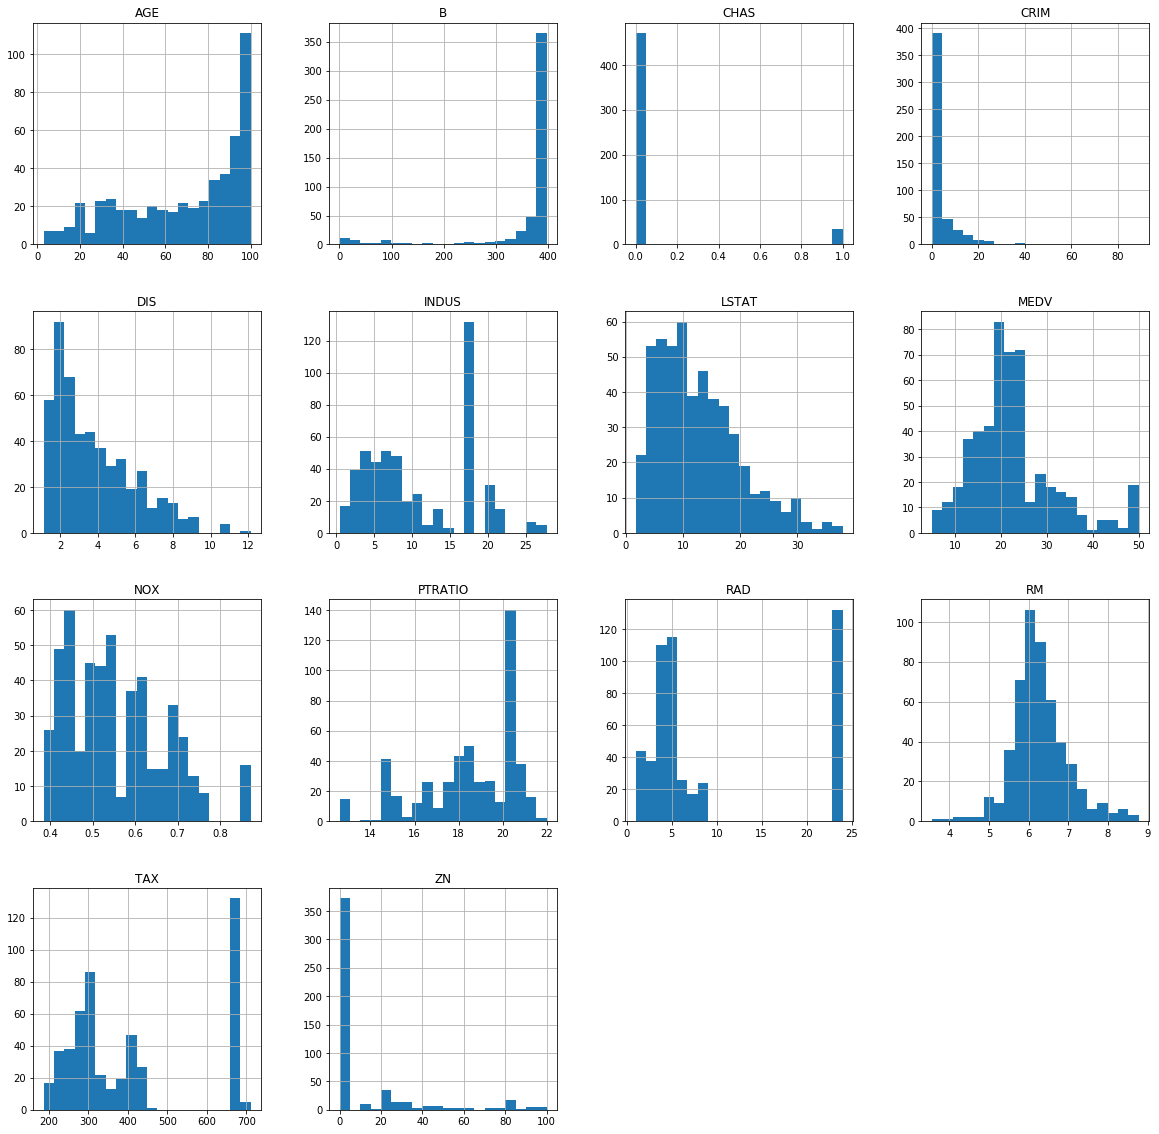

In [8]:
df.hist(bins=20, figsize=(20,20))
plt.show()

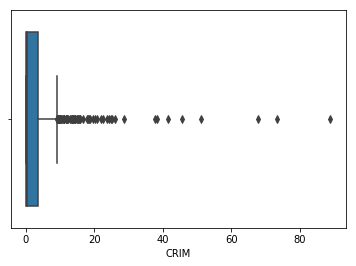

In [9]:
 sns.boxplot(x="CRIM", data=df)

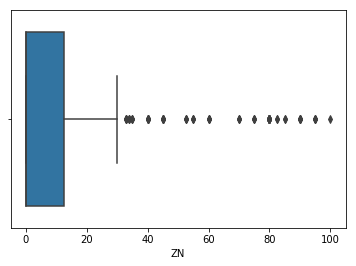

In [10]:
sns.boxplot(x="ZN", data=df)

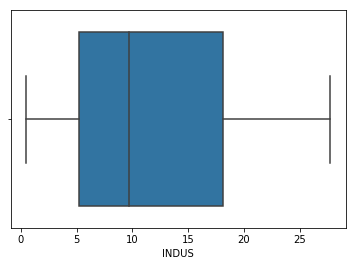

In [11]:
sns.boxplot(x="INDUS", data=df)

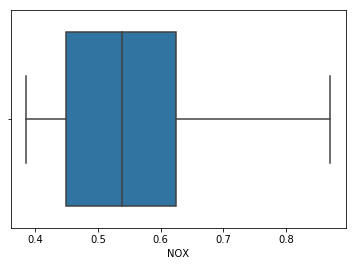

In [12]:
sns.boxplot(x="NOX", data=df)

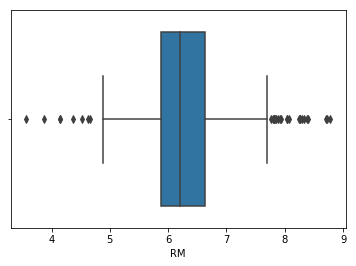

In [13]:
sns.boxplot(x="RM", data=df)

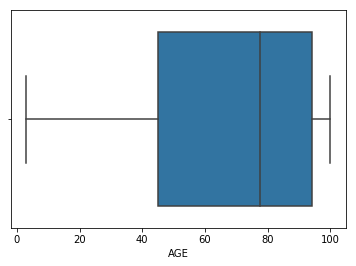

In [14]:
sns.boxplot(x="AGE", data=df)

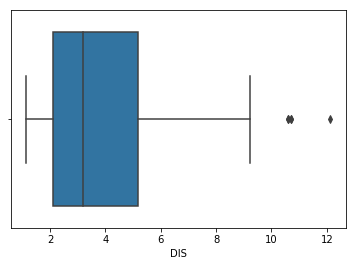

In [15]:
sns.boxplot(x="DIS", data=df)

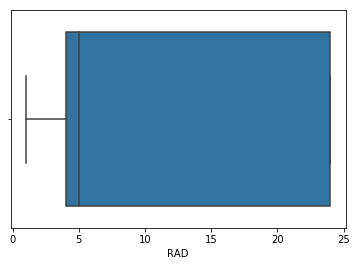

In [16]:
sns.boxplot(x="RAD", data=df)

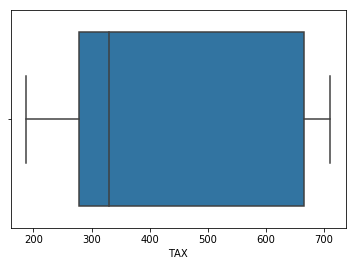

In [17]:
sns.boxplot(x="TAX", data=df)

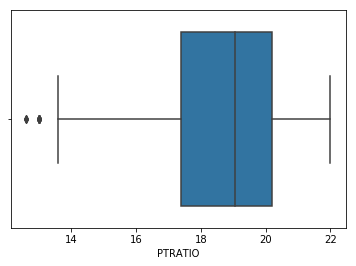

In [18]:
sns.boxplot(x="PTRATIO", data=df)

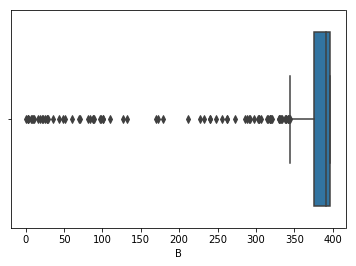

In [19]:
sns.boxplot(x="B", data=df)

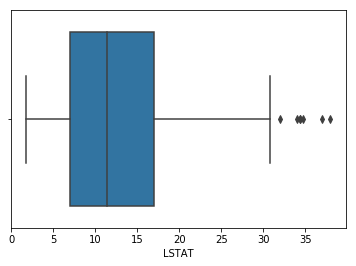

In [20]:
sns.boxplot(x="LSTAT", data=df)

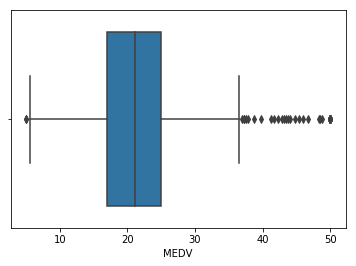

In [21]:
sns.boxplot(x="MEDV", data=df)

## Outiler Treatment-

In [39]:
 for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [56]:
# Let's remove CRIM outliers 
df['CRIM'].replace(df.CRIM>1,0,inplace=True)
median = df.loc[df['CRIM']<1, 'CRIM'].median()
df["CRIM"] = np.where(df["CRIM"] >1, median,df['CRIM'])

In [60]:
# Let's remove ZN outliers 
df['ZN'].replace(df.ZN>13,0,inplace=True)
median = df.loc[df['ZN']<13, 'ZN'].median()
df["ZN"] = np.where(df["ZN"] >13, median,df['ZN'])

In [61]:
# Let's remove RM outliers 
df['RM'].replace(df.RM>7,0,inplace=True)
df['RM'].replace(df.RM<5,0,inplace=True)
df["RM"] = np.where(df["RM"] >7, 6.2,df['RM'])
df["RM"] = np.where(df["RM"] <5, 6.2,df['RM'])

In [63]:
# Let's remove DIS outliers 
df['DIS'].replace(df.DIS>6,0,inplace=True)
median = df.loc[df['DIS']<6, 'DIS'].median()
df["DIS"] = np.where(df["DIS"] >6, median,df['DIS'])

In [65]:
# Let's remove B outliers 
df['B'].replace(df.B<375,0,inplace=True)
df["B"] = np.where(df["B"] <375, 391,df['B'])

In [75]:
# Let's remove LSTAT outliers 
df['LSTAT'].replace(df.LSTAT>37,0,inplace=True)
median = df.loc[df['LSTAT']<37, 'LSTAT'].median()
df["LSTAT"] = np.where(df["LSTAT"] >37, median,df['LSTAT'])

In [78]:
# Let's remove MEDV outliers 
df['MEDV'].replace(df.MEDV>35,0,inplace=True)
median = df.loc[df['MEDV']<35, 'MEDV'].median()
df["MEDV"] = np.where(df["MEDV"] >35, median,df['MEDV'])

In [80]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.177448,0.247036,11.136779,0.069170,0.554695,6.159982,68.574901,2.980234,9.549407,408.237154,18.455534,391.723241,12.130040,20.327668
std,0.169652,1.741526,6.860353,0.253994,0.115878,0.383124,28.148861,1.179160,8.707259,168.537116,2.164946,5.166624,6.374157,5.883912
min,0.006320,0.000000,0.460000,0.000000,0.385000,5.000000,2.900000,1.129600,1.000000,187.000000,12.600000,375.210000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.926250,45.025000,2.100175,4.000000,279.000000,17.400000,391.000000,6.950000,17.025000
50%,0.146710,0.000000,9.690000,0.000000,0.538000,6.200000,77.500000,2.717500,5.000000,330.000000,19.050000,391.440000,11.110000,20.400000
75%,0.153583,0.000000,18.100000,0.000000,0.624000,6.403500,94.075000,3.671500,24.000000,666.000000,20.200000,396.225000,16.275000,23.375000
max,0.988430,12.500000,27.740000,1.000000,0.871000,6.998000,100.000000,5.985300,24.000000,711.000000,22.000000,396.900000,29.970000,34.900000


In [82]:
df.shape

(506, 14)

## Correlation Matrix-

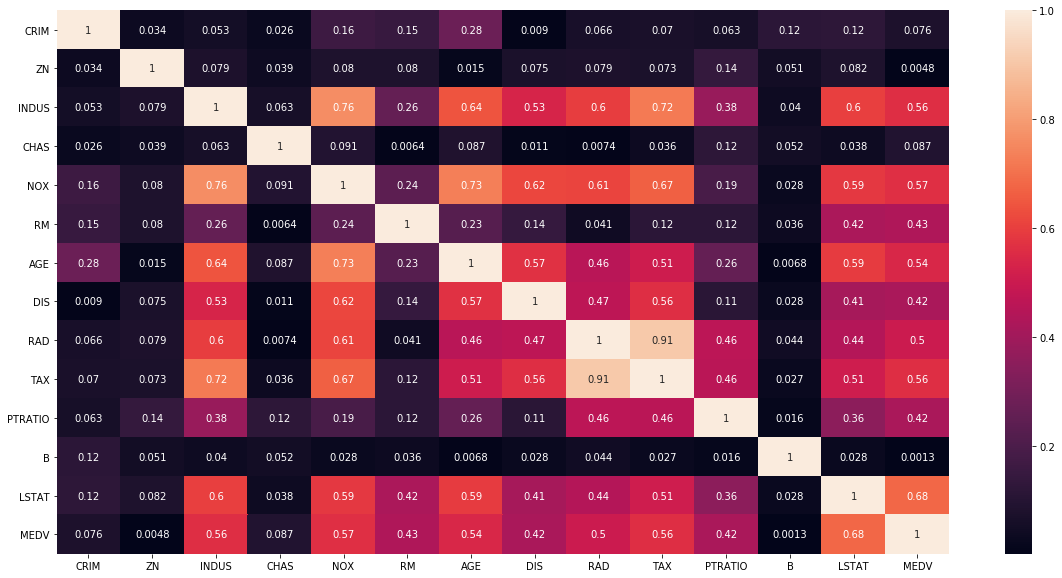

In [81]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
# From correlation matrix, we see TAX, LSTAT and NOX are highly correlated features. 
# The columns TAX,LSTAT,NOX,INDUS,RM,AGE and RAD has a correlation score above 0.5 with MEDV 
# which is a good indication of using as predictors.

# Split into Train and Test

In [91]:
X = df[['TAX','LSTAT','NOX','INDUS','RM','AGE','RAD']]
Y = df['MEDV']

# Splitting the dataset into the Training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

# Model Building

## Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(X_train,Y_train)

pred_y = lm.predict(X_test)

In [100]:
print('Coefficient: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficient: 
 [-0.0059584  -0.33827419 -1.10560524 -0.01854933  3.02830612 -0.02014704
 -0.09540513]
Intercept: 
 11.345737441444872


Text(0, 0.5, 'Predicted Y')

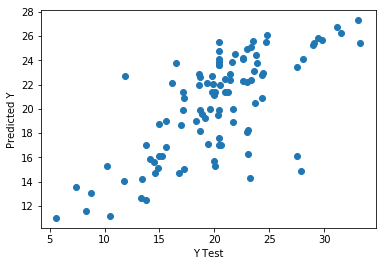

In [101]:
plt.scatter(Y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [102]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_y)))

Mean Absolute Error: 2.909584128540798
Mean Squared Error: 14.328666665316446
Root Mean Squared Error: 3.785322531214011


## SVR

In [119]:
from sklearn.svm import SVR

In [120]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = regressor.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [121]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.4937637493674827
Mean Squared Error: 23.662814551941945
Root Mean Squared Error: 4.864443909836144


## Gradient Boosting Regressor

In [123]:
from sklearn import ensemble

In [124]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gbregressor = ensemble.GradientBoostingRegressor(**params)

gbregressor.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [125]:
# Predict model to test data
Y_pred = gbregressor.predict(X_test)

In [126]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.7519267489284625
Mean Squared Error: 21.779013093851354
Root Mean Squared Error: 4.666799020083397
